In [19]:
import numpy as np
from numba import jit

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import ipywidgets as ipy

import numpy.random as rd

# TP4

## Exercício 1

In [3]:
# Import the data from the text file
fileName = "velocities.txt"
data = np.loadtxt(fileName,float)
t = data[:,0]
v = data[:,1]

In [4]:
# Alínea 1

# Integrator using trapezoidal rule, given the data as arrays
def integrate_trapezoidal_data(x_array, y_array):
    h = (x_array[-1] - x_array[0])/(x_array.size-1) # Separation
    return h*(0.5*(y_array[0]+y_array[-1]) + np.sum(y_array[1:-1]))

print(integrate_trapezoidal_data(t,v))

8.218923999999998


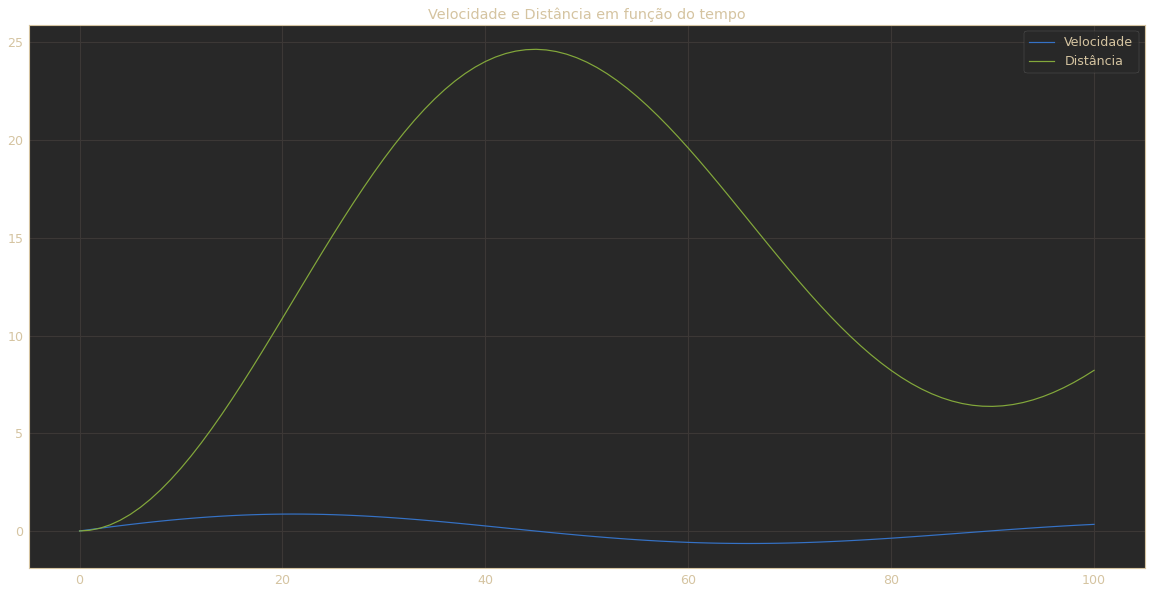

In [5]:
# Alínea 2

# Distance as a function of time
x = np.empty(t.shape)
for i in range(1,t.size):
    x[i] = integrate_trapezoidal_data(t[0:i+1],v[0:i+1])

x[0] = 0

# Draw the graph
plt.figure(figsize = (20,10))
plt.plot(t,v,label="Velocidade")
plt.plot(t,x,label="Distância")
plt.title("Velocidade e Distância em função do tempo")
plt.legend()
plt.show()

## Exercício 2

In [6]:
# Simpson's Rule Integral
# f must be vectorized, N must be even
def integrate_simpson(f, minValue, maxValue, N):
    arr = np.linspace(minValue, maxValue, N+1) # N+1 points for N intervals
    h = (maxValue-minValue)/N
    return (1.0/3.0)*h*(f(minValue) + f(maxValue) + 4*np.sum(f(arr[1:-1:2])) + 2*np.sum(f(arr[2:-1:2])))

# Trapezoidal Rule Integral
# f must be vectorized
def integrate_trapezoidal(f, minValue, maxValue, N):
    arr = np.linspace(minValue, maxValue, N+1) # N+1 points for N intervals
    h = (maxValue-minValue)/N
    return h*(0.5*(f(arr[0]) + f(arr[-1])) + np.sum(f(arr[1:-1])))


In [7]:
# Alínea 1 e 2

# Function to integrate (vectorized)
def func(x):
    return x**4-2*x+1

teorico = 1.0/5.0 * 2**5  - 2**2 + 2
numerico1_simpson = integrate_simpson(func,0,2,10)

print("Valor Teórico: ",teorico)
print("Valor numérico: ",numerico1_simpson)
print("Erro: ", np.abs(teorico - numerico1_simpson)/teorico * 100, "%")

Valor Teórico:  4.4
Valor numérico:  4.400426666666667
Erro:  0.009696969696972665 %


In [8]:
# Alínea 3

# N = 100
numerico2_simpson = integrate_simpson(func,0,2,100)
numerico2_trap = integrate_trapezoidal(func,0,2,100)
print("N = 100")
print("\tValor Teórico: ",teorico)
print("\tValor numérico: ",numerico2_simpson)
print("\tValor numérico trapezoidal: ",numerico2_trap)
print("\tErro simpson: ", np.abs(teorico - numerico2_simpson)/teorico * 100, "%")
print("\tErro trapezoidal: ", np.abs(teorico - numerico2_trap)/teorico * 100, "%")

# N = 1000
numerico3_simpson = integrate_simpson(func,0,2,1000)
numerico3_trap = integrate_trapezoidal(func,0,2,1000)
print("N = 1000")
print("\tValor Teórico: ",teorico)
print("\tValor numérico: ",numerico3_simpson)
print("\tValor numérico trapezoidal: ",numerico3_trap)
print("\tErro simpson: ", np.abs(teorico - numerico3_simpson)/teorico * 100, "%")
print("\tErro trapezoidal: ", np.abs(teorico - numerico3_trap)/teorico * 100, "%")

N = 100
	Valor Teórico:  4.4
	Valor numérico:  4.400000042666667
	Valor numérico trapezoidal:  4.401066656
	Erro simpson:  9.69696969186564e-07 %
	Erro trapezoidal:  0.024242181818179272 %
N = 1000
	Valor Teórico:  4.4
	Valor numérico:  4.400000000004267
	Valor numérico trapezoidal:  4.400010666665601
	Erro simpson:  9.697293473271367e-11 %
	Erro trapezoidal:  0.0002424242181947084 %


## Exercício 3

In [9]:
# Alínea 1

def test(x):
    return np.exp(-x**2)

print(integrate_simpson(test,0,3,int(3/0.1)))

0.8862073362266246


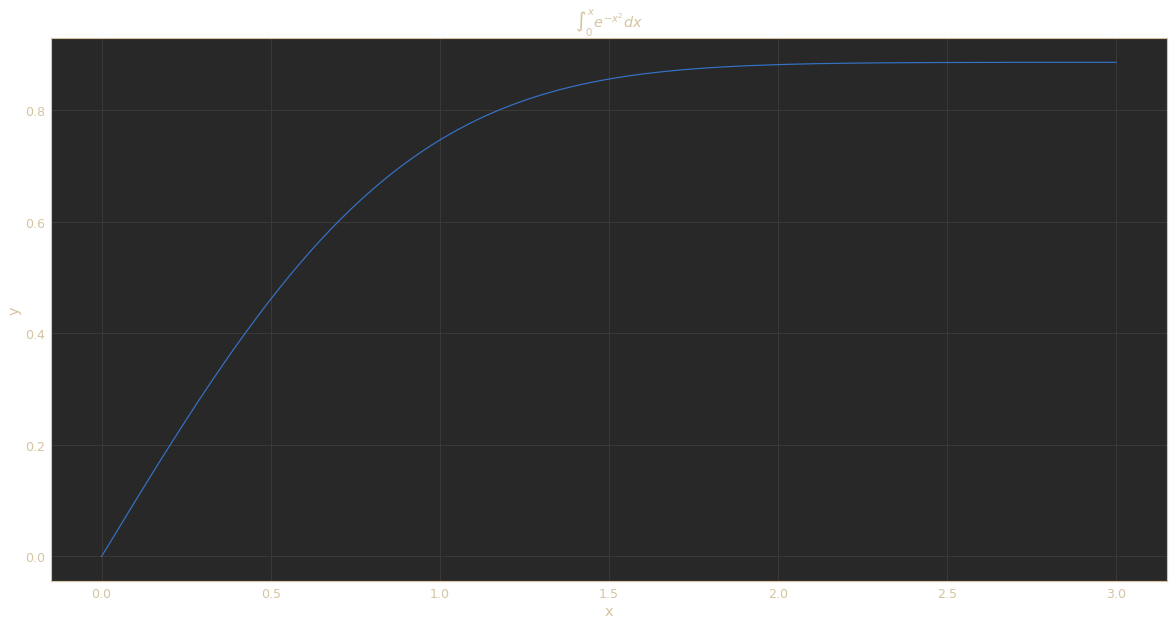

In [10]:
# Alínea 2

def graph_integral(x):
    return integrate_simpson(test,0,x,30)

# Draw the graph
x_arr = np.arange(0,3,0.001)
y_arr = np.vectorize(graph_integral)(x_arr)

plt.figure(figsize=(20,10))
plt.plot(x_arr,y_arr)
plt.title("$\int_{0}^{x} e^{-x^2} dx$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## Exercício 4

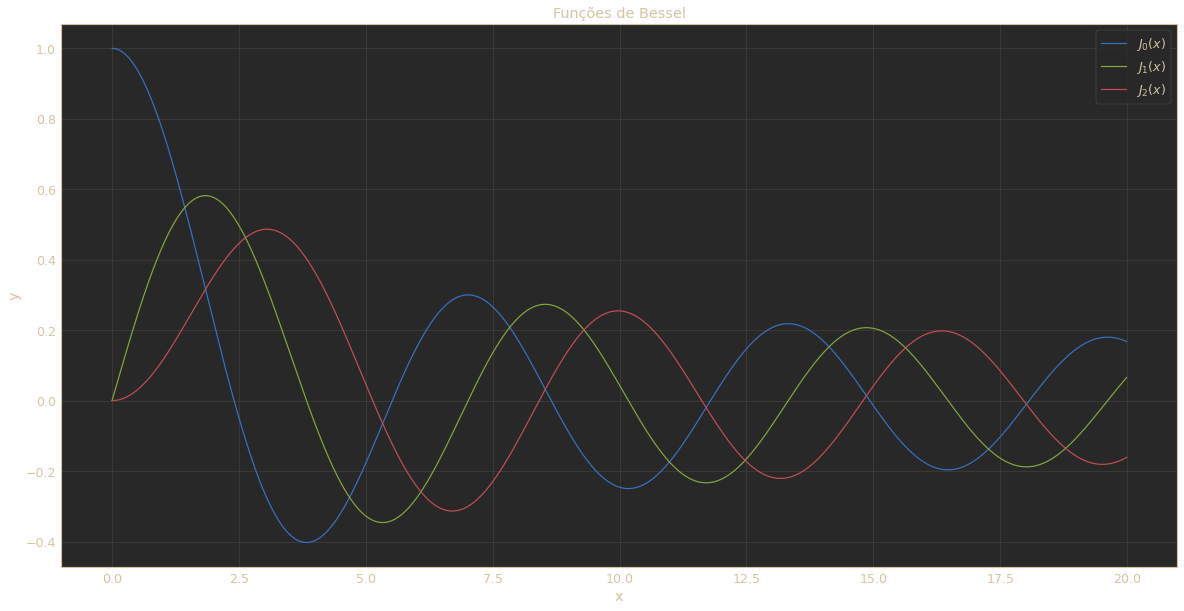

In [11]:
# Alínea 1

def J(m,x):
    return 1/np.pi * integrate_simpson(lambda theta: np.cos(m*theta-x*np.sin(theta)),0,np.pi,1000)

x_arr = np.arange(0,20,0.01)
y0_arr = np.vectorize(lambda x: J(0,x))(x_arr)
y1_arr = np.vectorize(lambda x: J(1,x))(x_arr)
y2_arr = np.vectorize(lambda x: J(2,x))(x_arr)

plt.figure(figsize=(20,10))
plt.plot(x_arr,y0_arr,label="$J_0(x)$")
plt.plot(x_arr,y1_arr,label="$J_1(x)$")
plt.plot(x_arr,y2_arr,label="$J_2(x)$")
plt.title("Funções de Bessel")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

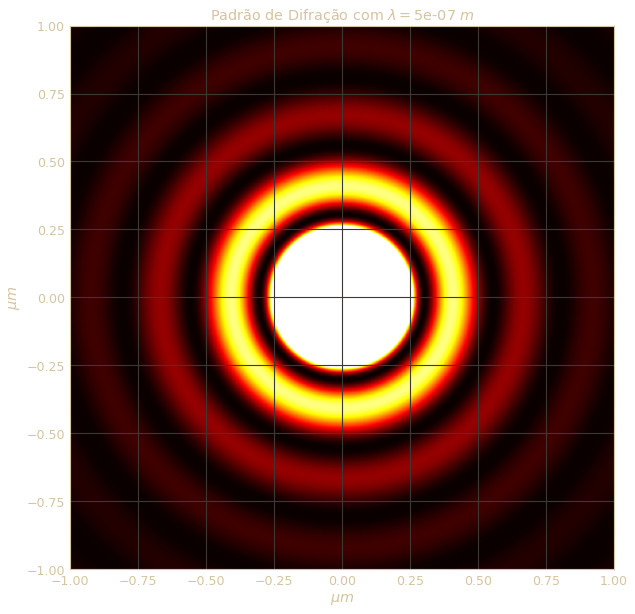

In [12]:
# Alínea 2

# Distance to origin
def distance(x,y):
    return np.sqrt(x**2+y**2)

# We'll first calculate a quarter-plane (symmetry), and the one of the axis
# The origin will be set to the highest possible value, we don't calculate because it divides by 0

# Useful values
side = 201 # Must be odd
maxrange = 1e-6 # Range of the square
#matrixSide = side*2+1
multiplier = maxrange/side

wavelenght = 500e-9
k = 2*np.pi/wavelenght
maxValue = 0.005


# PLANE
distMatr = np.zeros((side,side),float)
for x in range(side):
    for y in range(side):
        distMatr[y,x] = distance(y*multiplier,x*multiplier) + 1*multiplier # Plus one to shift it up to the needed place
dispMatr = np.vectorize(lambda r: (J(1,k*r)/(k*r))**2 )(distMatr)

# AXIS
# Create an array with the distances to each point in the plane
distArr = np.arange(1,side+1,1) * multiplier
dispArr = np.vectorize(lambda r: (J(1,k*r)/(k*r))**2 )(distArr)

# Create the display plane
disp = np.empty((side*2+1,side*2+1))

disp[:,side+1:] = np.concatenate((np.flip(dispMatr,axis=0),dispArr[None,:],dispMatr),axis=0)
disp[:,:side] = np.flip(disp[:,side+1:],axis = 1)
tmp = np.array(maxValue)
disp[:,side] = np.concatenate((np.flip(dispArr,axis=0),tmp[None],dispArr))

# Draw the graph
plt.figure(figsize=(20,10))
plt.hot()
extent = side*multiplier*10**6
plt.imshow(disp.T,origin="lower",vmax=maxValue,extent=[-extent,extent,-extent,extent])
plt.xlabel("$\mu m$")
plt.ylabel("$\mu m$")
plt.title("Padrão de Difração com $\lambda = $"+str(wavelenght)+" $m$")
plt.show()

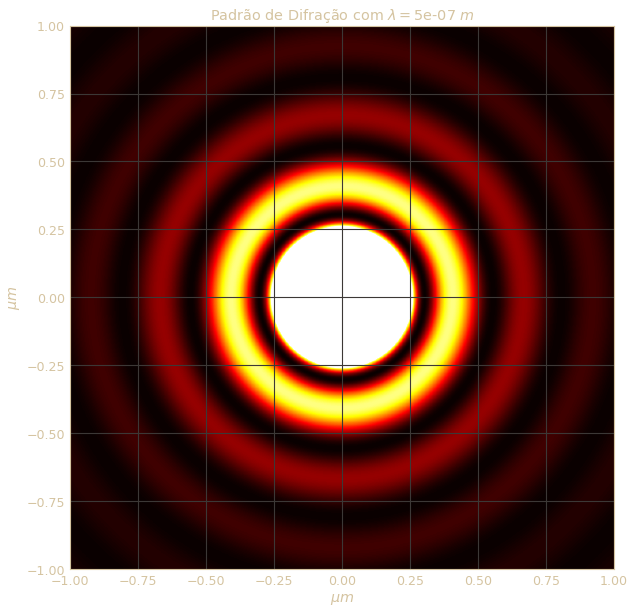

In [13]:
# Alínea 2, mas agora sendo inteligente

def distance_grid(minValue,maxValue,L):
    arr = np.linspace(minValue,maxValue,L)
    ones = np.ones(L)
    x = np.outer(ones,arr)
    y = np.outer(arr,ones)
    return np.sqrt(np.flip(x**2+y**2,axis=0)) # Flip to return what we're asked (it's inverted in y)

# We'll first calculate a quarter-plane (symmetry), and we'll join the quarter planes into the final plane
# We choose the number of points to be even, so that intersections are not considered

# Useful values
side = 200 # Must be evne
maxrange = 1e-6 # Range of the square
multiplier = maxrange/side

wavelenght = 500e-9
k = 2*np.pi/wavelenght
maxValue = 0.005


# PLANE
distMatr = distance_grid(0.5*multiplier,maxrange,side)

# Calculate
dispQuadrant = np.vectorize(lambda r: (J(1,k*r)/(k*r))**2)(distMatr)

# Create the display plane
disp = np.block(
    [[np.flip(dispQuadrant,axis=1), dispQuadrant],
     [np.transpose(dispQuadrant), np.flip(dispQuadrant,axis=0)]]
)

# Draw the graph
plt.figure(figsize=(20,10))
plt.hot()
extent = side*multiplier*10**6
plt.imshow(disp.T,origin="lower",vmax=maxValue,extent=[-extent,extent,-extent,extent])
plt.xlabel("$\mu m$")
plt.ylabel("$\mu m$")
plt.title("Padrão de Difração com $\lambda = $"+str(wavelenght)+" $m$")
plt.show()

## Exercício 5

Vamos denotar o verdadeiro valor do integral por $I$. Se calcularmos este integral numericamente, utilizando a regra de Simpson, obtemos um valor, $I_1$, a que está associado um erro $\epsilon_1$, e sabemos que este erro vai com $h^4$, ou seja, podemos escrever:
$$\epsilon_1 = ch_2^4$$
Em que $c$ é uma constante. Se calcularmos novamente o integral numericamente, utilizando um $h_2 = \frac{1}{2}h_1$, obtemos um valor $I_2$ com um erro $\epsilon_2 = ch_2^4$.
Podemos também escrever $I$, o verdadeiro valor, como:
$$ I = I_1 + \epsilon_1$$
$$I = I_2 + \epsilon_2$$
Igualando, obtemos $I_2-I_1 = ch_1^4-ch_2^4$ e substituindo $h_1 = 2h_2$ obtemos $ch_2^4 = \frac{I_2-I_1}{15}$, ou seja,
$$ \epsilon_2 = \frac{I_2-I_1}{15}$$

## Exercício 6

In [14]:
def integrate_trapezoidal_err(f, minValue, maxValue, N):
    """
    Calculate the value of the integral of f from minValue to maxValue, using N intervals (N even)
    Return the value of the integral, plus the error estimate (value, error)
    """
    integral = integrate_trapezoidal(f,minValue,maxValue,N)
    integral_err = integrate_trapezoidal(f,minValue,maxValue,N//2)
    return integral, (1/3) * (integral - integral_err)

N = 20 # Number of intervals

def test(x):
    return x**4-2*x+1

value,error = integrate_trapezoidal_err(test,0,2,N)
erro_t = 1.0/5.0 * 2**5  - 2**2 + 2 - value

print("Valor = ",value,"\nErro (calculado) = ", error, "\nErro (teórico) = ",erro_t)


Valor =  4.426660000000001 
Erro (calculado) =  -0.026633333333333137 
Erro (teórico) =  -0.026660000000000572


A diferença entre o erro calculado e o erro teórico pode ser atribuído a 2 causas:  
* Erros de arredondamento, quer no cálculo de um quer no outro, pois implica subtraír dois números que, em princípio, são próximos um do outro  
* O erro calculado é apenas uma estimativa, estamos a considerar apenas os termos de ordem $h^2$ e a ignorar termos de ordem superior, o que também introduz erro na nossa estimativa

## Exercício 7

In [15]:
# Alínea 1

def helper(f,arr,h):
    return h*(0.5*f(arr[0]) + 0.5*f(arr[-1]) + np.sum(f(arr[1:-1])))/0

def integrate_trapezoidal_adapt(f,minValue,maxValue,err,N):
    """
    Calculate the value of the integral of f from minValue to maxValue, with less than 'err' error, starting with N slices
    Return the value of the integral, plus the error estimate (value, error)
    """
    err = abs(err)

    h_old = (maxValue-minValue)/N
    arr_old = np.arange(minValue,maxValue+h_old,h_old)
    I_old = h_old*(0.5*f(arr_old[0]) + 0.5*f(arr_old[-1]) + np.sum(f(arr_old[1:-1])))
    #I_old = helper(f,arr_old,h_old)
    
    h_new = h_old/2
    arr_new = np.arange(minValue+h_new,maxValue,h_new*2)
    I_new = 0.5 * I_old + h_new*np.sum(f(arr_new))
    
    error = (1/3)*(I_new - I_old)
    
    print("Num intervalos: ",(maxValue-minValue)/h_new, ", Valor: ", I_new, ", Erro: ",error)
    
    while abs(error) >= err:
        h_old = h_new
        I_old = I_new
        
        h_new = h_old/2
        arr_new = np.arange(minValue+h_new,maxValue,h_new*2)
        I_new = 0.5 * I_old + h_new*np.sum(f(arr_new))
        error = (1/3)*(I_new-I_old)
        print("Num intervalos: ",(maxValue-minValue)/h_new, ", Valor: ", I_new, ", Erro: ",error)
    
    return I_new,error

def test(x):
    return (np.sin(np.sqrt(100*x)))**2


value, err = integrate_trapezoidal_adapt(test,0,1,1e-6,1)

print("Adaptativo: Valor final= ", value, ", Erro= ", err)

value, err = integrate_trapezoidal_err(test,0,1,4096)
print("Fixo, N=4096: Valor final= ", value, ", Erro= ", err)

Num intervalos:  2.0 , Valor:  0.3252319078064746 , Erro:  0.05908414108660753
Num intervalos:  4.0 , Valor:  0.5122828507233315 , Erro:  0.06235031430561895
Num intervalos:  8.0 , Valor:  0.4029974484782483 , Erro:  -0.03642846741502771
Num intervalos:  16.0 , Valor:  0.430103369294747 , Erro:  0.009035306938832902
Num intervalos:  32.0 , Valor:  0.44841466578746997 , Erro:  0.0061037654975743165
Num intervalos:  64.0 , Valor:  0.4539129312153759 , Erro:  0.0018327551426353117
Num intervalos:  128.0 , Valor:  0.45534850437280217 , Erro:  0.000478524385808754
Num intervalos:  256.0 , Valor:  0.4557112664532411 , Erro:  0.00012092069347964991
Num intervalos:  512.0 , Valor:  0.45580219965166413 , Erro:  3.0311066141005167e-05
Num intervalos:  1024.0 , Valor:  0.4558249481324202 , Erro:  7.582826918687649e-06
Num intervalos:  2048.0 , Valor:  0.4558306362016461 , Erro:  1.8960230753021592e-06
Num intervalos:  4096.0 , Valor:  0.4558320582782708 , Erro:  4.7402554155991555e-07
Adaptativo:

In [16]:
# Alínea 2

def integrate_romberg(f,minValue,maxValue,err):
    """
    Calculate the value of the integral of f from minValue to maxValue, using Romberg Integration, with less than 'err' error
    Return the value of the integral, plus the error estimate (value, error)
    (Notice that the error estimate is slightly higher than the real value, given the characteristics of Romberg Integration)
    """
    err = abs(err) # Take the absolut value for the error

    # Start by setting some variables outside the cycle
    h_new = maxValue-minValue
    I_new = (h_new)*(0.5*f(minValue)+0.5*f(maxValue)) # Trapezoidal with N = 1
    R_new = [I_new]
    i = 1 # Counter
    
    print("R("+str(i)+")",R_new)
    
    # Romberg routine
    while True:
        # New integral using trapezoidal
        h_old = h_new
        I_old = I_new # Saving the old values
        
        h_new = h_old/2
        arr_new = np.arange(minValue+h_new,maxValue,h_new*2)
        I_new = 0.5 * I_old + h_new*np.sum(f(arr_new))
        
        # Start romberg
        R_old = R_new # Save old value
        R_new = [I_new]
        errorEstimate = 0
        for j in range(1,i+1):
            errorEstimate = (1/(4**j-1))*(R_new[j-1]-R_old[j-1])
            R_new.append(R_new[j-1]+ errorEstimate)
        print("R("+str(i)+")",R_new)
        
        i += 1
        
        # Check error, return if less than required
        if abs(errorEstimate) <= err:
            return R_new[-1],errorEstimate
        
integrate_romberg(test,0,1,1e-6)

R(1) [0.147979484546652]
R(1) [0.3252319078064746, 0.38431604889308213]
R(2) [0.5122828507233315, 0.5746331650289505, 0.5873209727713417]
R(3) [0.4029974484782483, 0.3665689810632206, 0.35269803546550527, 0.34897386185747614]
R(4) [0.430103369294747, 0.43913867623357994, 0.4439766559116039, 0.44542552290281184, 0.4458037647108328]
R(5) [0.44841466578746997, 0.45451843128504427, 0.4555437482884752, 0.45572735292937794, 0.45576775226281546, 0.455777492231097]
R(6) [0.4539129312153759, 0.4557456863580112, 0.4558275033628757, 0.4558320074116757, 0.45583241782141015, 0.45583248103309987, 0.45583249446137875]


(0.45583249446137875, 1.3428278877383781e-08)

## Exercício 8

In [17]:
def integrate_simpson_adapt(f,minValue,maxValue,err,N):
    """
    Calculate the value of the integral of f from minValue to maxValue using Simpson's rule, with less than 'err' error, starting with N slices
    Return the value of the integral, plus the error estimate (value, error)
    """
    err = abs(err)
    
    # First N
    h_old = (maxValue-minValue)/N
    arr_new = np.arange(minValue,maxValue+h_old,h_old)
    T_old = (2/3)*np.sum(f(arr_new[1:-1:2]))
    S = (1/3)*(f(arr_new[0]) + f(arr_new[-1]) + 2*np.sum(f(arr_new[2:-1:2])))
    I_old = h_old*(S+2*T_old)

    h_new = h_old/2
    arr_new = np.arange(minValue+h_new,maxValue,2*h_new)
    T_new = (2/3)*np.sum(f(arr_new))
    S = S + T_old
    I_new = h_new*(S+2*T_new)
    
    errorEstimate = (1/15)*(I_new-I_old)
    
    print((maxValue-minValue)/h_new, I_new,errorEstimate)
    while abs(errorEstimate) >= err:
        # Store the old values
        h_old = h_new
        T_old = T_new
        I_old = I_new
        
        # Calculate the new values
        h_new = h_old/2
        arr_new = np.arange(minValue+h_new,maxValue,2*h_new)
        T_new = (2/3)*np.sum(f(arr_new))
        S = S + T_old
        I_new = h_new*(S+2*T_new)
        
        errorEstimate = (1/15)*(I_new-I_old)
        
        print((maxValue-minValue)/h_new, I_new,errorEstimate)
    
    return I_new,errorEstimate

integrate_simpson_adapt(test,0,1,1e-6,2)

4.0 0.5746331650289503 0.012687807742391213
8.0 0.36656898106322056 -0.013870945597715319
16.0 0.4391386762335798 0.004837979678023951
32.0 0.45451843128504427 0.0010253170034309625
64.0 0.45574568635801116 8.181700486445954e-05
128.0 0.4558270287586109 5.422826706650655e-06
256.0 0.4558321871467207 3.4389254065144335e-07


(0.4558321871467207, 3.4389254065144335e-07)

In [18]:
# Comparação de tempos

def integrate_trapezoidal_adapt_noprint(f,minValue,maxValue,err,N):
    """
    Calculate the value of the integral of f from minValue to maxValue, with less than 'err' error, starting with N slices
    Return the value of the integral, plus the error estimate (value, error)
    """
    err = abs(err)

    h_old = (maxValue-minValue)/N
    arr_old = np.arange(minValue,maxValue+h_old,h_old)
    I_old = h_old*(0.5*f(arr_old[0]) + 0.5*f(arr_old[-1]) + np.sum(f(arr_old[1:-1])))
    
    h_new = h_old/2
    arr_new = np.arange(minValue+h_new,maxValue,h_new*2)
    I_new = 0.5 * I_old + h_new*np.sum(f(arr_new))
    
    error = (1/3)*(I_new - I_old)
    
    #print("Num intervalos: ",(maxValue-minValue)/h_new, ", Valor: ", I_new, ", Erro: ",error)
    
    while abs(error) >= err:
        h_old = h_new
        I_old = I_new
        
        h_new = h_old/2
        arr_new = np.arange(minValue+h_new,maxValue,h_new*2)
        I_new = 0.5 * I_old + h_new*np.sum(f(arr_new))
        error = (1/3)*(I_new-I_old)
        #print("Num intervalos: ",(maxValue-minValue)/h_new, ", Valor: ", I_new, ", Erro: ",error)
    
    return I_new,error



def integrate_romberg_noprint(f,minValue,maxValue,err):
    """
    Calculate the value of the integral of f from minValue to maxValue, using Romberg Integration, with less than 'err' error
    Return the value of the integral, plus the error estimate (value, error)
    (Notice that the error estimate is slightly higher than the real value, given the characteristics of Romberg Integration)
    """
    err = abs(err) # Take the absolut value for the error

    # Start by setting some variables outside the cycle
    h_new = maxValue-minValue
    I_new = (h_new)*(0.5*f(minValue)+0.5*f(minValue)) # Trapezoidal with N = 1
    R_new = [I_new]
    i = 1 # Counter
    
    #print("R("+str(i)+")",R_new)
    
    # Romberg routine
    while True:
        # New integral using trapezoidal
        h_old = h_new
        I_old = I_new # Saving the old values
        
        h_new = h_old/2
        arr_new = np.arange(minValue+h_new,maxValue,h_new*2)
        I_new = 0.5 * I_old + h_new*np.sum(f(arr_new))
        
        # Start romberg
        R_old = R_new # Save old value
        R_new = [I_new]
        errorEstimate = 0
        for j in range(1,i+1):
            errorEstimate = (1/(4**j-1))*(R_new[j-1]-R_old[j-1])
            R_new.append(R_new[j-1]+ errorEstimate)
        #print("R("+str(i)+")",R_new)
        
        i += 1
        
        # Check error, return if less than required
        if abs(errorEstimate) <= err:
            return R_new[-1],errorEstimate

def integrate_simpson_adapt_noprint(f,minValue,maxValue,err,N):
    """
    Calculate the value of the integral of f from minValue to maxValue using Simpson's rule, with less than 'err' error, starting with N slices
    Return the value of the integral, plus the error estimate (value, error)
    """
    err = abs(err)
    
    # First N
    h_old = (maxValue-minValue)/N
    arr_new = np.arange(minValue,maxValue+h_old,h_old)
    T_old = (2/3)*np.sum(f(arr_new[1:-1:2]))
    S = (1/3)*(f(arr_new[0])+f(arr_new[-1])+2*np.sum(f(arr_new[2:-1:2])))
    I_old = h_old*(S+2*T_old)
    
    h_new = h_old/2
    arr_new = np.arange(minValue+h_new,maxValue,2*h_new)
    T_new = (2/3)*np.sum(f(arr_new))
    S = S + T_old
    I_new = h_new*(S+2*T_new)
    
    errorEstimate = (1/15)*(I_new-I_old)
    
    counter = 0
    while abs(errorEstimate) >= err:
        # Store the old values
        h_old = h_new
        T_old = T_new
        I_old = I_new
        
        # Calculate the new values
        h_new = h_old/2
        arr_new = np.arange(minValue+h_new,maxValue,2*h_new)
        T_new = (2/3)*np.sum(f(arr_new))
        S = S + T_old
        I_new = h_new*(S+2*T_new)
        
        errorEstimate = (1/15)*(I_new-I_old)
        
        counter +=1
        #print(counter, I_new,errorEstimate)
    
    return I_new,errorEstimate

    
%timeit integrate_trapezoidal_err(test,0,1,4096)
%timeit integrate_trapezoidal_adapt_noprint(test,0,1,1e-6,1)
%timeit integrate_romberg_noprint(test,0,1,1e-6)
%timeit integrate_simpson_adapt_noprint(test,0,1,1e-6,2)

219 µs ± 6.15 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
234 µs ± 7.68 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
104 µs ± 3.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
117 µs ± 2.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
